#geopandas

 Geopandas is a python library that extends 'pandas' by adding support for geospatial data

 ## Reproducible file paths

In [ ]:

import os
import matplotlib.pyplot as plt
import geopandas as gpd

In [ ]:

fp = os.path.join('data','gbif_sus_scrofa_california')
fp


'data\\gbif_sus_scrofa_california'

In [ ]:
#looking at the data in pigs
pigs = gpd.read_file(fp)
pigs.head()

,gbifID,species,state,individual,day,month,year,inst,collection,catalogNum,identified,geometry
0,899953814,Sus scrofa,California,NaN,22.0,3.0,2014.0,iNaturalist,Observations,581956,edwardrooks,POINT (-121.53812 37.08846)
1,899951348,Sus scrofa,California,NaN,9.0,6.0,2007.0,iNaturalist,Observations,576047,Bruce Freeman,POINT (-120.54942 35.47354)
2,896560733,Sus scrofa,California,NaN,20.0,12.0,1937.0,MVZ,Hild,MVZ:Hild:195,"Museum of Vertebrate Zoology, University of Ca...",POINT (-122.27063 37.87610)
3,896559958,Sus scrofa,California,NaN,1.0,4.0,1969.0,MVZ,Hild,MVZ:Hild:1213,"Museum of Vertebrate Zoology, University of Ca...",POINT (-121.82297 38.44543)
4,896559722,Sus scrofa,California,NaN,1.0,1.0,1961.0,MVZ,Hild,MVZ:Hild:1004,"Museum of Vertebrate Zoology, University of Ca...",POINT (-121.74559 38.54882)


In [ ]:

# Check in #1
#importing the shapefile
shp_file = os.path.join('data','ca_state_boundary')
cali = gpd.read_file(shp_file)


In [ ]:
cali   

,REGION,DIVISION,STATEFP,STATENS,GEOID,STUSPS,NAME,LSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,4,9,06,01779778,06,CA,California,00,G4000,A,403501101370,20466718403,+37.1551773,-119.5434183,"MULTIPOLYGON (((-119.63473 33.26545, -119.6363..."


## `Geoseries` and `GeoDataframe`
`geopandas.GeoDataframe` = core structure in geopandas = 'panDAS.dATAFRAME' PLUSA A DEDICATED GEOMETRY
COLUMN THAT CAN PERFORM SPATIAL OPS

**Geometry column** holds the geometry of eacg spatial feature. The type of this columns is geopandas.dataframe


In [ ]:
#checking type of data of pigs
print(type(pigs))


<class 'geopandas.geodataframe.GeoDataFrame'>


In [ ]:
#checking the data type of the geom column
print(type(pigs.geometry))


<class 'geopandas.geoseries.GeoSeries'>


In [ ]:
#check the data type of the gbifID column
print(type(pigs.gbifID))


<class 'pandas.core.series.Series'>


In [ ]:
#check the data type of each column
print(pigs.dtypes)


gbifID           int64
species         object
state           object
individual     float64
day            float64
month          float64
year           float64
inst            object
collection      object
catalogNum      object
identified      object
geometry      geometry
dtype: object


In [ ]:
#check-in number #2
print(type(cali))


<class 'geopandas.geodataframe.GeoDataFrame'>


In [ ]:
cali.geom_type

0    MultiPolygon
dtype: object

In [ ]:
#access the CRS of the GeoDataframe
pigs.crs


<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [ ]:
# Examine CRS details
print('Ellipsoid: ', pigs.crs.ellipsoid)
print('Datum: ', pigs.crs.datum)
print('Is geographic?: ', pigs.crs.is_geographic)
print('Is projected?: ', pigs.crs.is_projected)


Ellipsoid:  WGS 84
Datum:  World Geodetic System 1984 ensemble
Is geographic?:  True
Is projected?:  False


In [ ]:
# Obtain the geographic extent of the geo-dataframe
pigs.total_bounds


array([-124.29448 ,   32.593433, -115.4356  ,   40.934296])

In [ ]:
# check-in #3
# crs
cali.crs
# extent
cali.total_bounds


array([-124.48201686,   32.52883674, -114.13122248,   42.00950827])

In [ ]:
### Data Wrangling

# examine pig observation by year
pigs['year'].value_counts().sort_index()


year
1818.0     31
1910.0      1
1925.0      1
1927.0      4
1929.0      3
         ... 
2019.0    101
2020.0    159
2021.0    164
2022.0    185
2023.0     98
Name: count, Length: 61, dtype: int64

In [ ]:
# select data from 2020 onwards
pigs_recent = pigs[pigs['year'] >= 2020]
pigs_recent


,gbifID,species,state,individual,day,month,year,inst,collection,catalogNum,identified,geometry
61,4424675671,Sus scrofa,California,NaN,23.0,9.0,2023.0,iNaturalist,Observations,186357811,madamcoyote,POINT (-124.28580 40.32482)
62,4424357894,Sus scrofa,California,NaN,6.0,10.0,2023.0,iNaturalist,Observations,186474363,skullroy,POINT (-120.82724 35.34895)
63,4424357588,Sus scrofa,California,NaN,5.0,10.0,2023.0,iNaturalist,Observations,186333783,Brian Ahern,POINT (-121.71683 37.34602)
64,4424288359,Sus scrofa,California,NaN,7.0,10.0,2023.0,iNaturalist,Observations,186602594,Steph,POINT (-119.62832 37.28900)
65,4424285723,Sus scrofa,California,NaN,5.0,10.0,2023.0,iNaturalist,Observations,186479844,natleecrockett,POINT (-121.77317 37.50025)
...,...,...,...,...,...,...,...,...,...,...,...,...
727,2563540650,Sus scrofa,California,NaN,20.0,1.0,2020.0,iNaturalist,Observations,37804173,Eric,POINT (-121.98693 37.87490)
728,2563520717,Sus scrofa,California,NaN,17.0,1.0,2020.0,iNaturalist,Observations,37758359,Jacob Martin,POINT (-122.00615 37.80658)
729,2563516057,Sus scrofa,California,NaN,18.0,1.0,2020.0,iNaturalist,Observations,37741027,Anne Parsons,POINT (-121.67951 37.32578)
730,2563508248,Sus scrofa,California,NaN,18.0,1.0,2020.0,iNaturalist,Observations,37723068,Anne Parsons,POINT (-121.67664 37.32354)


In [ ]:
# check the length of the og dataframe
print("total number of observations: ", len(pigs))


total number of observations:  1046


In [ ]:
# check length of the recent dataframe
print("total number of pig obervations since 2020 onwards ", len(pigs_recent))


total number of pig obervations since 2020 onwards  606


<Axes: >

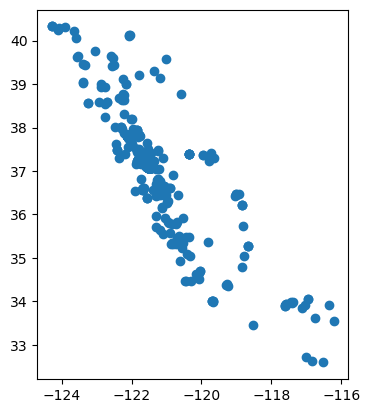

In [ ]:
# plotting
pigs_recent.plot()



## 'matplotlib'

we can interact with 'matplotlib' via its 'pyplot' interface

Matplotliv graphs the data in a figure that can have one or more **axes. The axes isd only ythe area spercified by the axis and the y axis what is plotted in it. A figure can include multiple axis


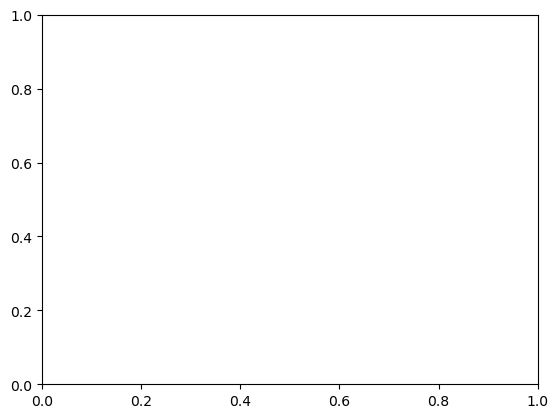

In [ ]:

# Initialize empty figure (fig) and axis (ax)
fig, ax = plt.subplots() #returns two objects, the fig and the axis

# Display figure
plt.show()

### Adding a layer

When ysing matplotlibm it can be useful to think of creating a plot as adding layers on an axis

# Example

The first layer we want to add to our axis is the pigs recent point data

NameError: name 'df' is not defined

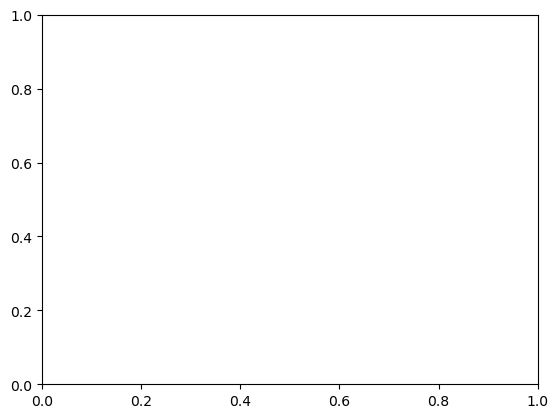

In [ ]:
# Initialize empty figure and axis
fig, ax = plt.subplots()

# Plot df on the ax axis
pigs_recent(ax=ax,  # Add plot to axis
)    # Other arguments for plot function

# Display figure
plt.show()

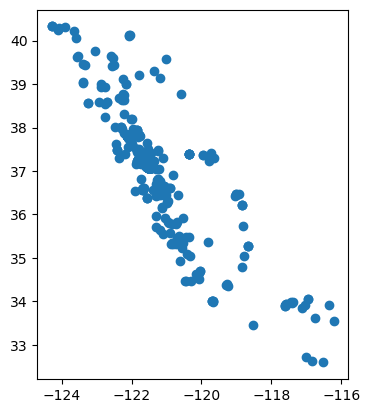

In [ ]:
# Initialize empyty figure and axis
fig, ax = plt.subplots()

# Add pigs point plot to our figure's axis
pigs_recent.plot(ax=ax)

# Display figure
plt.show()

## Customization

some customiation can be done directly in plot(), method of the dataframe 

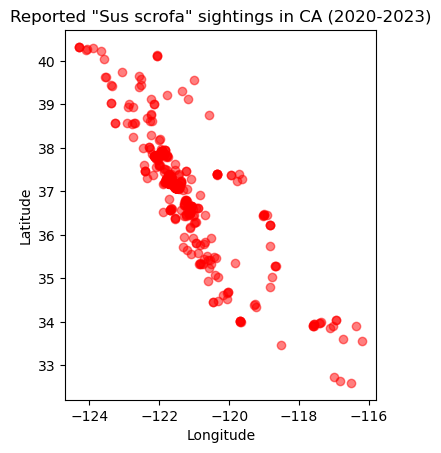

In [ ]:
# Initialize empty figure
fig, ax = plt.subplots()

# Add data to axis
pigs_recent.plot(ax=ax,         # Add plot to axis
                 alpha=0.5,     # Adjust transparency
                 color='red'  # Update point color
                 )

# Update axis 
ax.set_title('Reported "Sus scrofa" sightings in CA (2020-2023)')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Display figure
plt.show()

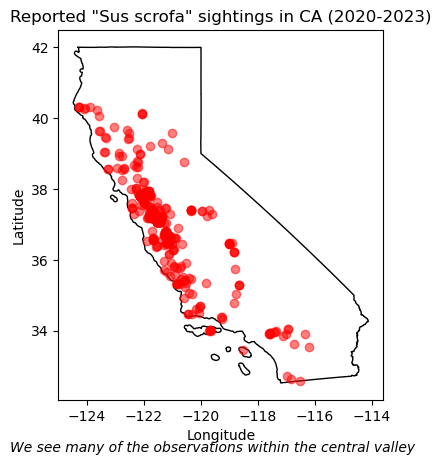

In [ ]:
# Check-in #4

 # Initialize empty figure
fig, ax = plt.subplots()

# adding border data
cali.plot(ax=ax,
          edgecolor = "black",
          facecolor="none",
          linewidth=1)


# Add data to axis
pigs_recent.plot(ax=ax,         # Add plot to axis
                 alpha=0.5,     # Adjust transparency
                 color='red'  # Update point color
                 marker=","
                 )

# Update axis 
ax.set_title('Reported "Sus scrofa" sightings in CA (2020-2023)')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# adding text
fig.text(0.5, 0.001,
         'We see many of the observations within the central valley',
         ha='center', fontsize = 10, style= 'italic')

# Display figure
plt.show()

"Sus Scrofa" sighting in California's Central Valley and Bay Area

Based on the graph above we can see many of these sighting are around the central valley and bar area. Some may not know what this species is as an identifyer. Moreo observations may be neat less populated areas and or areas claser to roads.